In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import sklearn
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
df=pd.read_excel('StudentDetailss.xlsx')

In [113]:
df.head()


,Student / Subjects,Programming,Data Structures,Algorithms,DBMS,SDLC,Operating Systems,Software Design and Architecture,Web Development,OOPS,...,A/B Testing,Statistics,Data Cleaning and Wrangling,Excel Skills,Databases,Business Intelligence Tools,Data Interpretation,Critical Thinking and Problem-Solving,Ethics in Data Analysis,Version Control
0,Student1,3,3,1,1,3,0,0,0,1,...,2,0,3,1,1,2,3,3,0,1
1,Student2,1,0,0,1,1,2,0,0,1,...,1,1,1,3,3,3,2,2,3,2
2,Student3,2,0,1,3,3,2,2,2,2,...,2,1,2,1,1,2,3,3,0,3
3,Student4,1,1,3,2,1,1,2,2,3,...,1,1,1,3,0,3,2,3,2,1
4,Student5,2,2,3,0,2,0,0,2,1,...,2,3,1,3,0,1,2,1,1,3


In [114]:
df.columns=df.columns.str.replace(" ","_")

In [115]:
df.columns=df.columns.str.replace("Student_/_Subjects","Student_name")

In [116]:
df.columns

Index(['Student_name', 'Programming', 'Data_Structures', 'Algorithms', 'DBMS',
       'SDLC', 'Operating_Systems', 'Software_Design_and_Architecture',
       'Web_Development', 'OOPS', 'Cryptography', 'Network_Security',
       'Security_Policies_and_Procedures',
       'Vulnerability_Assessment_and_Penetration_Testing',
       'Security_Information_and_Event_Management_(SIEM)',
       'Identity_and_Access_Management_(IAM)', 'Programming2',
       'Data_Structures_and_Algorithms', 'Machine_Learning_Fundamentals',
       'Deep_Learning', 'Natural_Language_Processing_(NLP)',
       'Data_Preprocessing_and_Feature_Engineering',
       'Data_Wrangling_and_Cleaning', 'Data_Exploration_and_Visualization',
       'Machine_Learning', 'Deep_Learning_1', 'Feature_Engineering',
       'Statistical_Modeling', 'Big_Data_Technologies', 'A/B_Testing',
       'Statistics', 'Data_Cleaning_and_Wrangling', 'Excel_Skills',
       'Databases', 'Business_Intelligence_Tools', 'Data_Interpretation',
       'C

In [117]:
df=df.drop(['Data_Structures', 'Algorithms','Programming2','Machine_Learning_Fundamentals', 'Deep_Learning_1','Data_Cleaning_and_Wrangling'],axis=1)

In [118]:
df=df.drop(["Student_name"],axis=1)

In [119]:
df.columns=df.columns.str.replace("Statistics","mathematics")

In [120]:
df=df.drop(['Programming','Web_Development','Natural_Language_Processing_(NLP)','Statistical_Modeling','Big_Data_Technologies', 'A/B_Testing','Version_Control', 'Business_Intelligence_Tools', 'Data_Interpretation',
       'Critical_Thinking_and_Problem-Solving','Feature_Engineering'],axis=1)

In [121]:
df

,DBMS,SDLC,Operating_Systems,Software_Design_and_Architecture,OOPS,Cryptography,Network_Security,Security_Policies_and_Procedures,Vulnerability_Assessment_and_Penetration_Testing,Security_Information_and_Event_Management_(SIEM),...,Data_Structures_and_Algorithms,Deep_Learning,Data_Preprocessing_and_Feature_Engineering,Data_Wrangling_and_Cleaning,Data_Exploration_and_Visualization,Machine_Learning,mathematics,Excel_Skills,Databases,Ethics_in_Data_Analysis
0,1,3,0,0,1,1,0,0,2,1,...,3,0,1,0,0,2,0,1,1,0
1,1,1,2,0,1,1,0,3,3,1,...,3,2,3,1,2,0,1,3,3,3
2,3,3,2,2,2,2,3,1,3,0,...,0,2,1,1,0,2,1,1,1,0
3,2,1,1,2,3,1,3,2,1,1,...,3,3,0,0,3,2,1,3,0,2
4,0,2,0,0,1,2,3,1,3,0,...,0,2,1,3,0,3,3,3,0,1
5,1,2,3,1,2,2,1,2,2,2,...,2,2,1,2,3,2,0,0,3,2
6,0,0,0,3,2,0,1,2,2,2,...,0,1,3,3,2,3,2,1,3,2
7,3,0,0,1,1,0,3,2,1,0,...,3,0,2,0,1,2,2,1,3,1
8,2,3,1,3,3,1,3,1,3,3,...,1,0,0,0,2,0,3,1,0,3
9,1,2,2,0,2,1,2,2,1,2,...,0,1,3,3,2,0,0,0,0,2


In [122]:
def find_career(student_marks):
    career_all={'software_developer/engineer':0,'information_security_analyst':0,'machine_learning':0,'data_scientist':0,'data_analyst':0}
    s=[0,1,2,3,4,11]
    i=[5,6,7,8,9,10]
    m=[11,12,13,14,16,17]
    ds=[12,13,14,15,16,17]
    da=[11,14,17,18,19,20]
    for subject in range(len(student_marks)):
        if subject in s:
            career_all['software_developer/engineer']+=student_marks[subject]
        if subject in i:
            career_all['information_security_analyst']+=student_marks[subject]
        if subject in m:
            career_all['machine_learning']+=student_marks[subject]
        if subject in ds:
            career_all['data_scientist']+=student_marks[subject]
        if subject in da:
            career_all['data_analyst']+=student_marks[subject]
    return max(career_all,key=career_all.get),max(career_all.values())
find_career(df.iloc[9].tolist())
        
    


('data_scientist', 9)

In [123]:
df.head(5)

,DBMS,SDLC,Operating_Systems,Software_Design_and_Architecture,OOPS,Cryptography,Network_Security,Security_Policies_and_Procedures,Vulnerability_Assessment_and_Penetration_Testing,Security_Information_and_Event_Management_(SIEM),...,Data_Structures_and_Algorithms,Deep_Learning,Data_Preprocessing_and_Feature_Engineering,Data_Wrangling_and_Cleaning,Data_Exploration_and_Visualization,Machine_Learning,mathematics,Excel_Skills,Databases,Ethics_in_Data_Analysis
0,1,3,0,0,1,1,0,0,2,1,...,3,0,1,0,0,2,0,1,1,0
1,1,1,2,0,1,1,0,3,3,1,...,3,2,3,1,2,0,1,3,3,3
2,3,3,2,2,2,2,3,1,3,0,...,0,2,1,1,0,2,1,1,1,0
3,2,1,1,2,3,1,3,2,1,1,...,3,3,0,0,3,2,1,3,0,2
4,0,2,0,0,1,2,3,1,3,0,...,0,2,1,3,0,3,3,3,0,1


In [124]:
df.shape

(33, 21)

In [125]:

sample_list=df.iloc[-1].tolist()
for i in range(10000):
    random.shuffle(sample_list)
    df=pd.concat([df,pd.DataFrame([sample_list],columns=df.columns)],ignore_index=True)

In [126]:

df=pd.concat([df,pd.DataFrame([df.iloc[-1].tolist()],columns=df.columns)],ignore_index=True)

In [127]:
df=df.drop_duplicates()

In [128]:
df.shape

(10033, 21)

In [129]:
values_of_career=[]
max_value_of_subjects=[]
for i in range(df.shape[0]):
    a=find_career(df.iloc[i].tolist())
    
    values_of_career.append(a[0])
    max_value_of_subjects.append(a[1])
    

In [130]:
df['career']=values_of_career
df["max_mark_of_subject"]=max_value_of_subjects

In [131]:
df

,DBMS,SDLC,Operating_Systems,Software_Design_and_Architecture,OOPS,Cryptography,Network_Security,Security_Policies_and_Procedures,Vulnerability_Assessment_and_Penetration_Testing,Security_Information_and_Event_Management_(SIEM),...,Data_Preprocessing_and_Feature_Engineering,Data_Wrangling_and_Cleaning,Data_Exploration_and_Visualization,Machine_Learning,mathematics,Excel_Skills,Databases,Ethics_in_Data_Analysis,career,max_mark_of_subject
0,1,3,0,0,1,1,0,0,2,1,...,1,0,0,2,0,1,1,0,software_developer/engineer,8
1,1,1,2,0,1,1,0,3,3,1,...,3,1,2,0,1,3,3,3,data_analyst,14
2,3,3,2,2,2,2,3,1,3,0,...,1,1,0,2,1,1,1,0,software_developer/engineer,12
3,2,1,1,2,3,1,3,2,1,1,...,0,0,3,2,1,3,0,2,software_developer/engineer,12
4,0,2,0,0,1,2,3,1,3,0,...,1,3,0,3,3,3,0,1,machine_learning,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,1,2,0,3,1,0,1,0,2,3,...,3,1,1,2,2,3,3,1,machine_learning,11
10029,2,1,2,0,1,1,3,1,1,3,...,0,2,3,1,1,2,3,0,information_security_analyst,11
10030,3,1,2,2,1,2,0,3,1,1,...,3,1,3,0,2,2,1,3,software_developer/engineer,12
10031,1,2,3,0,2,2,1,1,3,3,...,3,0,0,3,1,2,1,1,information_security_analyst,12


In [132]:
# df.to_excel("/Users/slord/Documents/collagefinalyear/career_guide_tool/new_dataset.xlsx")

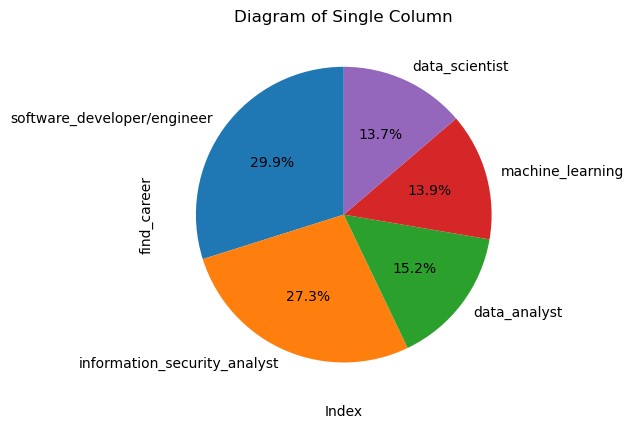

In [133]:
plt.pie(df['career'].value_counts(),labels=df['career'].value_counts().index,autopct='%1.1f%%', startangle=90)
plt.xlabel('Index')
plt.ylabel('find_career')
plt.title('Diagram of Single Column')
plt.show()

In [134]:
x=df.iloc[:,:-2].values
y=df.iloc[:,-2].values

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)
x

array([[1, 3, 0, ..., 1, 1, 0],
       [1, 1, 2, ..., 3, 3, 3],
       [3, 3, 2, ..., 1, 1, 0],
       ...,
       [3, 1, 2, ..., 2, 1, 3],
       [1, 2, 3, ..., 2, 1, 1],
       [1, 2, 3, ..., 1, 3, 0]])

In [136]:
print(x_test[0])
print(y_test[0])


[0 2 2 1 1 3 3 2 1 1 0 3 1 1 3 0 2 1 2 3 3]
data_analyst


In [137]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


knn

In [138]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier=KNeighborsClassifier()
# classifier.fit(x_train,y_train)

In [139]:
# y_pred=classifier.predict(x_test)

In [140]:
# from sklearn.metrics import confusion_matrix,classification_report
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
ran_classifier=RandomForestClassifier()
ran_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
ran_y_pred=ran_classifier.predict(x_test)

In [143]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,ran_y_pred))
print(classification_report(y_test,ran_y_pred))

[[211   8  50  11  47]
 [  4 220  24   0  21]
 [  4  13 454  13  59]
 [ 14   1  39 182  33]
 [  4   9  27   8 551]]
                              precision    recall  f1-score   support

                data_analyst       0.89      0.65      0.75       327
              data_scientist       0.88      0.82      0.85       269
information_security_analyst       0.76      0.84      0.80       543
            machine_learning       0.85      0.68      0.75       269
 software_developer/engineer       0.77      0.92      0.84       599

                    accuracy                           0.81      2007
                   macro avg       0.83      0.78      0.80      2007
                weighted avg       0.81      0.81      0.80      2007



In [144]:
print(x_test)

[[-1.60808193  0.32703865  0.32398736 ...  0.32059252  1.28172908
   1.28781503]
 [-0.64527211 -0.62778573  0.32398736 ...  1.28501365  1.28172908
   1.28781503]
 [ 1.28034751  0.32703865  0.32398736 ...  1.28501365  1.28172908
  -0.63355376]
 ...
 [-0.64527211  1.28186303 -1.58590803 ... -1.60824973  0.31905291
  -0.63355376]
 [-0.64527211 -0.62778573 -1.58590803 ...  0.32059252  0.31905291
   1.28781503]
 [ 1.28034751  1.28186303 -0.63096033 ...  0.32059252 -0.64362327
  -0.63355376]]


In [145]:
tets_a=scaler.transform([[3,0,3,1,3,2,0,3,2,3,3,1,3,2,0,1,2,3,1,2,3]])
print(tets_a)
ran_classifier.predict(tets_a)

[[ 1.28034751 -1.5826101   1.27893506 -0.64452541  1.28278607  0.32278339
  -1.59971235  1.27472406  0.33699974  1.26104935  1.27193361 -0.64849065
   1.29128766  0.31023844 -1.60877198 -0.62695149  0.31735535  1.30896212
  -0.64382861  0.31905291  1.28781503]]


array(['information_security_analyst'], dtype=object)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(ran_y_pred,y_test)

0.8061783756851021

In [147]:
df.columns


Index(['DBMS', 'SDLC', 'Operating_Systems', 'Software_Design_and_Architecture',
       'OOPS', 'Cryptography', 'Network_Security',
       'Security_Policies_and_Procedures',
       'Vulnerability_Assessment_and_Penetration_Testing',
       'Security_Information_and_Event_Management_(SIEM)',
       'Identity_and_Access_Management_(IAM)',
       'Data_Structures_and_Algorithms', 'Deep_Learning',
       'Data_Preprocessing_and_Feature_Engineering',
       'Data_Wrangling_and_Cleaning', 'Data_Exploration_and_Visualization',
       'Machine_Learning', 'mathematics', 'Excel_Skills', 'Databases',
       'Ethics_in_Data_Analysis', 'career', 'max_mark_of_subject'],
      dtype='object')

In [148]:
# from joblib import dump
# dump(ran_classifier,'/home/sahil/career_guidance_tool/saveModels/model.joblib')